In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('titanic/train.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print("age null percentage: ")
print(df['Age'].isnull().sum()/df.shape[0]*100)

age null percentage: 
19.865319865319865


In [8]:
df['Age'].min()

0.42

<AxesSubplot:ylabel='Density'>

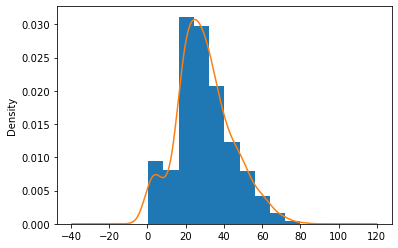

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ageplot=df['Age'].hist(bins=10,stacked=True,density=True)
df['Age'].plot(kind='density')

In [10]:
age_median=df['Age'].median()
age_median

28.0

In [11]:
print('Cabin null value percentage: ')
print(df['Cabin'].isnull().sum()/df.shape[0]*100)

Cabin null value percentage: 
77.10437710437711


In [12]:
print('Embarked null percentage: ')
print(df['Embarked'].isnull().sum()/df.shape[0]*100)

Embarked null percentage: 
0.22446689113355783


In [13]:
embarked_mode=df['Embarked'].mode()
embarked_mode

0    S
dtype: object

In [14]:
data=df.copy()
data['Age'].fillna(age_median,inplace=True)
data.drop('Cabin',axis=1,inplace=True)
data['Embarked'].fillna('embarked_mode',inplace=True)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [18]:
data['travel_alone']=np.where(data['SibSp']+data['Parch']>0,0,1)
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [19]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Embarked  travel_alone  
0         A/5 21171   7.2500        S             0  
1          PC 17599  71.2833        C             0  
2  STON/O2. 3101282   7.9250        S             1  
3            113803  53.1000        S             0  
4            373450   8.0500        S             1

In [20]:
data.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)
data.head()

Survived  Pclass     Sex   Age Embarked  travel_alone
0         0       3    male  22.0        S             0
1         1       1  female  38.0        C             0
2         1       3  female  26.0        S             1
3         1       1  female  35.0        S             0
4         0       3    male  35.0        S             1

In [21]:
traind=pd.get_dummies(data,columns=["Pclass","Sex","Embarked"])

In [22]:
traind.head()

Survived   Age  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0             0         0         0         1           0   
1         1  38.0             0         1         0         0           1   
2         1  26.0             1         0         0         1           1   
3         1  35.0             0         1         0         0           1   
4         0  35.0             1         0         0         1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Embarked_embarked_mode  
0         1           0           0           1                       0  
1         0           1           0           0                       0  
2         0           0           0           1                       0  
3         0           0           0           1                       0  
4         1           0           0           1                       0

In [23]:
traind['Fare']=df['Fare']

In [24]:
traind.head()

Survived   Age  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0             0         0         0         1           0   
1         1  38.0             0         1         0         0           1   
2         1  26.0             1         0         0         1           1   
3         1  35.0             0         1         0         0           1   
4         0  35.0             1         0         0         1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Embarked_embarked_mode  \
0         1           0           0           1                       0   
1         0           1           0           0                       0   
2         0           0           0           1                       0   
3         0           0           0           1                       0   
4         1           0           0           1                       0   

      Fare  
0   7.2500  
1  71.2833  
2   7.9250  
3  53.1000  
4   8.0500

In [25]:
traind.drop('Sex_female',axis=1,inplace=True)

In [26]:
ftrain=traind
ftrain.head()

Survived   Age  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_male  \
0         0  22.0             0         0         0         1         1   
1         1  38.0             0         1         0         0         0   
2         1  26.0             1         0         0         1         0   
3         1  35.0             0         1         0         0         0   
4         0  35.0             1         0         0         1         1   

   Embarked_C  Embarked_Q  Embarked_S  Embarked_embarked_mode     Fare  
0           0           0           1                       0   7.2500  
1           1           0           0                       0  71.2833  
2           0           0           1                       0   7.9250  
3           0           0           1                       0  53.1000  
4           0           0           1                       0   8.0500

In [27]:
testdf=pd.read_csv('titanic/test.csv')

In [28]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
testdf["Age"].fillna(age_median,inplace=True)

In [30]:
testdf["Fare"].fillna(df["Fare"].median(),inplace=True)

In [31]:
testdf.drop('Cabin',axis=1,inplace=True)

In [32]:
testdf.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

<AxesSubplot:ylabel='Density'>

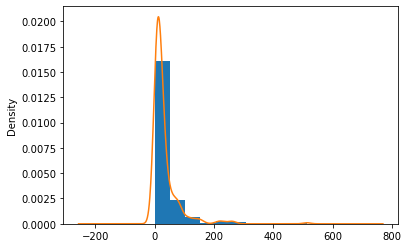

In [33]:
fareplot=df['Fare'].hist(bins=10,stacked=True,density=True)
df['Fare'].plot(kind='density')

In [34]:
testdf['travel_alone']=np.where(testdf['SibSp']+testdf['Parch']>0,0,1)
testdf.drop(['SibSp','Parch'],axis=1,inplace=True)

In [35]:
testdf.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age   Ticket     Fare Embarked  travel_alone  
0  34.5   330911   7.8292        Q             1  
1  47.0   363272   7.0000        S             0  
2  62.0   240276   9.6875        Q             1  
3  27.0   315154   8.6625        S             1  
4  22.0  3101298  12.2875        S             0

In [36]:
test=pd.get_dummies(testdf,columns=['Pclass','Sex','Embarked'])
test.head()

PassengerId                                          Name   Age   Ticket  \
0          892                              Kelly, Mr. James  34.5   330911   
1          893              Wilkes, Mrs. James (Ellen Needs)  47.0   363272   
2          894                     Myles, Mr. Thomas Francis  62.0   240276   
3          895                              Wirz, Mr. Albert  27.0   315154   
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0  3101298   

      Fare  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0   7.8292             1         0         0         1           0         1   
1   7.0000             0         0         0         1           1         0   
2   9.6875             1         0         1         0           0         1   
3   8.6625             1         0         0         1           0         1   
4  12.2875             0         0         0         1           1         0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           1           0  
1           0           0           1  
2           0           1           0  
3           0           0           1  
4           0           0           1

In [37]:
test.drop(['PassengerId','Name','Ticket','Sex_female'],axis=1,inplace=True)

In [38]:
test.head()

Age     Fare  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_male  \
0  34.5   7.8292             1         0         0         1         1   
1  47.0   7.0000             0         0         0         1         0   
2  62.0   9.6875             1         0         1         0         1   
3  27.0   8.6625             1         0         0         1         1   
4  22.0  12.2875             0         0         0         1         0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           1           0  
1           0           0           1  
2           0           1           0  
3           0           0           1  
4           0           0           1

In [39]:
ftest=test

In [40]:
ftest.head()

Age     Fare  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_male  \
0  34.5   7.8292             1         0         0         1         1   
1  47.0   7.0000             0         0         0         1         0   
2  62.0   9.6875             1         0         1         0         1   
3  27.0   8.6625             1         0         0         1         1   
4  22.0  12.2875             0         0         0         1         0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           1           0  
1           0           0           1  
2           0           1           0  
3           0           0           1  
4           0           0           1

In [41]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                891 non-null    int64  
 1   Age                     891 non-null    float64
 2   travel_alone            891 non-null    int32  
 3   Pclass_1                891 non-null    uint8  
 4   Pclass_2                891 non-null    uint8  
 5   Pclass_3                891 non-null    uint8  
 6   Sex_male                891 non-null    uint8  
 7   Embarked_C              891 non-null    uint8  
 8   Embarked_Q              891 non-null    uint8  
 9   Embarked_S              891 non-null    uint8  
 10  Embarked_embarked_mode  891 non-null    uint8  
 11  Fare                    891 non-null    float64
dtypes: float64(2), int32(1), int64(1), uint8(8)
memory usage: 31.4 KB


In [42]:
# ftrain['Age']=ftrain['Age'].astype(int)

In [43]:
ftrain['isMinor']=np.where(ftrain['Age']<=16,1,0)
ftest['isMinor']=np.where(ftest['Age']<=16,1,0)

In [44]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                891 non-null    int64  
 1   Age                     891 non-null    float64
 2   travel_alone            891 non-null    int32  
 3   Pclass_1                891 non-null    uint8  
 4   Pclass_2                891 non-null    uint8  
 5   Pclass_3                891 non-null    uint8  
 6   Sex_male                891 non-null    uint8  
 7   Embarked_C              891 non-null    uint8  
 8   Embarked_Q              891 non-null    uint8  
 9   Embarked_S              891 non-null    uint8  
 10  Embarked_embarked_mode  891 non-null    uint8  
 11  Fare                    891 non-null    float64
 12  isMinor                 891 non-null    int32  
dtypes: float64(2), int32(2), int64(1), uint8(8)
memory usage: 34.9 KB


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [48]:
x=ftrain.drop('Survived',axis=1)
y=ftrain['Survived']

In [49]:
x.head()

Age  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_male  Embarked_C  \
0  22.0             0         0         0         1         1           0   
1  38.0             0         1         0         0         0           1   
2  26.0             1         0         0         1         0           0   
3  35.0             0         1         0         0         0           0   
4  35.0             1         0         0         1         1           0   

   Embarked_Q  Embarked_S  Embarked_embarked_mode     Fare  isMinor  
0           0           1                       0   7.2500        0  
1           0           0                       0  71.2833        0  
2           0           1                       0   7.9250        0  
3           0           1                       0  53.1000        0  
4           0           1                       0   8.0500        0

In [50]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
model=LogisticRegression(max_iter=1000)

In [54]:
rfe=RFE(model,8)
rfe=rfe.fit(x,y)

C:\Users\nisha\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [57]:
print(list(x.columns[rfe.support_]))

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Embarked_embarked_mode', 'isMinor']


In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,precision_recall_curve,roc_curve,auc,log_loss

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(xtrain,ytrain)
ypred=logmodel.predict(xtest)
ypredp=logmodel.predict_proba(xtest)[:,1]
[fpr,tpr,thr]=roc_curve(ytest,ypredp)

In [64]:
print("Accuracy : "+str(accuracy_score(ytest,ypred)))
print("auc : "+str(auc(fpr,tpr)))

Accuracy : 0.776536312849162
auc : 0.8397468354430379


In [67]:
compdata=list(zip(ytest,ypred))
compt=pd.DataFrame(compdata,columns=['Actual','Predicted'])
compt

Actual  Predicted
0         1          0
1         0          0
2         1          1
3         0          0
4         1          1
..      ...        ...
174       0          0
175       0          0
176       0          0
177       0          0
178       0          0

[179 rows x 2 columns]

C:\Users\nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


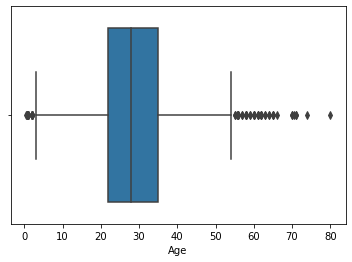

In [69]:
agebox=sns.boxplot(traind['Age'])

C:\Users\nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


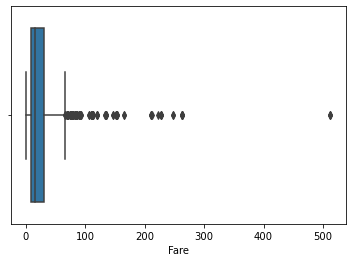

In [71]:
farebox=sns.boxplot(traind['Fare'])

In [81]:
traind['Age'].median()

28.0

In [78]:
traind['Fare'].median()

14.4542

In [79]:
xtrain.head()

Age  travel_alone  Pclass_1  Pclass_2  Pclass_3  Sex_male  Embarked_C  \
30   40.0             1         1         0         0         1           1   
10    4.0             0         0         0         1         0           0   
873  47.0             1         0         0         1         1           0   
182   9.0             0         0         0         1         1           0   
876  20.0             1         0         0         1         1           0   

     Embarked_Q  Embarked_S  Embarked_embarked_mode     Fare  isMinor  
30            0           0                       0  27.7208        0  
10            0           1                       0  16.7000        1  
873           0           1                       0   9.0000        0  
182           0           1                       0  31.3875        1  
876           0           1                       0   9.8458        0

In [83]:
x2=ftrain.drop(['Survived','Fare'],axis=1)
y2=ftrain['Survived']

In [84]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [85]:
logmodel2=LogisticRegression(max_iter=1000)
logmodel2.fit(xtrain2,ytrain2)
ypred2=logmodel2.predict(xtest2)
ypredp2=logmodel2.predict_proba(xtest2)[:,1]
[fpr,tpr,thr]=roc_curve(ytest2,ypredp2)

In [88]:
print("Accuracy : "+str(accuracy_score(ytest2,ypred2)))
print("auc : "+str(auc(fpr,tpr)))

Accuracy : 0.776536312849162
auc : 0.8393037974683545
